In [1]:
import sys; sys.path.append(_dh[0].split("knowknow")[0])
from knowknow import *

# cited works

In [2]:
database_name = "sociology-wos"
dtype = 'c'

In [3]:
# Parameters
database_name = "sociology-jstor"
dtype = "t"
birth_key = "first"
definitions_of_death = ["death2", "death3", "death5"]


In [4]:
cits = get_cnt("%s.ind"%database_name, [comb(dtype,'fy'),'fy',dtype])
cysum = load_variable("%s.%s.ysum"%(database_name,dtype))

Loaded keys: dict_keys(['fy.t', 'fy', 't'])
Available keys: ['a', 'a.c', 'a.fj.fy', 'c', 'c.c', 'c.fa', 'c.fj', 'c.fy', 'c.t', 'fa', 'fa.fj.fy', 'fj', 'fj.fy', 'fj.t', 'fy', 'fy.t', 't']


In [5]:
cc = Counter(int(x['total']) for _,x in cysum.items())
counts = []
totals = range(0,max(cc.keys())+1)
for i in totals:
    counts.append(cc[i])

In [6]:
# more than 5 times
print("%0.2f%% were cited more than 5 times" % (100 * sum(counts[i] for i in totals if i>5)/np.sum(totals)))

0.02% were cited more than 5 times


c:\users\amcga\envs\citation-deaths\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


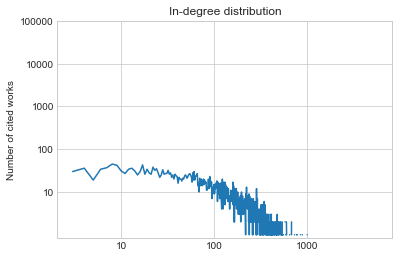

In [7]:
counts = np.array(counts)
totals = np.array(totals)
plt.plot(np.log10(totals),np.log10(counts))
xlab = np.array([1,2,3])
plt.xticks(
    xlab,
    np.power(10, xlab)
)
ylab = np.array([1,2,3,4,5])
plt.yticks(
    ylab,
    np.power(10, ylab)
)

plt.ylabel("Number of citations")
plt.ylabel("Number of cited works")
title = "Received citations distribution (%s, %s)" % (database_name,dtype)
plt.title(title)

save_figure(title)

In [8]:
import statsmodels.api as sm

In [9]:
lt,lc = [x for i,x in enumerate(totals) if (totals[i]>0 and counts[i]>0)], [x for i,x in enumerate(counts) if (totals[i]>0 and counts[i]>0)]
lt,lc = np.log(lt),np.log(lc)

X = sm.add_constant(lt)
y = lc

mod = sm.OLS(y,X)

In [10]:
res = mod.fit()

In [11]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     2149.
Date:                Sun, 24 May 2020   Prob (F-statistic):          1.53e-196
Time:                        00:15:59   Log-Likelihood:                -458.63
No. Observations:                 578   AIC:                             921.3
Df Residuals:                     576   BIC:                             930.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4272      0.114     56.255      0.000       6.203       6.652
x1            -0.9373      0.020    -46.358      0.000      -0.977      -0.898
==============================================================================
Omnibus:                       11.583   Durbin-Watson:                   1.069
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.798
Skew:                          -0.348   Prob(JB):                      0.00274
Kurtosis:                       3.078   Cond. No.                         29.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""